# __Un exemple de système chaotique__ - Ben Lichtfeld SPRINTB

## __Introduction__
Les __systèmes chaotiques__ sont des systèmes dynamiques qui présentent une sensibilité extrême à leurs conditions initiales. Ce phénomène, appelé également __chaos déterministe__ repose sur des équations du mouvement déterministes mais qui produisent un comportement imprévisible à long terme.  Ce caractère chaotique ne dépend pas de la complexité des équations ou de l'introduction de facteurs aléatoires, mais uniquement de la __dépendance aux conditions initiales__.  
Un exemple d'un tel système est __l'équation de logistique__ utilisée pour modéliser la dynamique d’une population soumise à des limitations de ressources (nourriture, etc.). Nous allons modéliser cela pour une population donnée (des lapins).  

Dans ce notebook, nous étudierons numériquement le comportement de cette équation en fonction de ses paramètres et de ses conditions initiales en ayant recours aux __suites récurrentes__. Nous identifirons les différentes dynamiques possibles, allant de la __stabilité__ au __chaos__.

## __1. Éléments théoriques__

Le modèle étudié est basé sur la dynamique d'une __population de lapins soumise à des contraintes environnementales__. L’objectif est de __modéliser l’évolution d’une population__ donnée en fonction de son taux de croissance, tout en prenant en compte les __ressources limitées__ du milieu.  

Tout d'abord, intéréssons nous au cas où l'environnement n'est __pas limité__ (aucune contraintes).  
La population suivrait alors une __croissance exponentielle__ : $n_{i+1} = \alpha n_i$, où $n_i$ est la population à l’année $i$ et $\alpha$>1 est le facteur de croissance annuel..  Si $\alpha$ est une constante, alors, on obtiendra à l'année $p$ : $$ n_p = \alpha^p n_0 $$  
Cependant, dans la réalité, la croissance est limitée par des __ressources finies__ et des __facteurs externes__ (prédateurs, maladies, concurrence). Le modèle doit ainsi tenir compte d’un nombre maximal de lapins $n_{max}$, au-delà duquel la croissance est freinée. Le facteur $\alpha$ n'est donc plus constant et peut s'écrire en fonction du taux de croissance maximale $r$ et $n_{max}$ comme : $$ \alpha = r \left( 1 - \frac{n_i}{n_{\max}} \right) $$
En combinant ces éléments, l’équation de l'évolution de la population devient : $$ n_{i+1} = r \left( 1 - \frac{n_i}{n_{\max}} \right) n_i$$ $$\Leftrightarrow$$ $$ x_{i+1} = r (1-x_i)x_i $$ où $x_i = n_i / n_{\max}$, représentant la proportion de la population par rapport à sa capacité maximale. 
Cette dernière équation est appelée __équation de logistique__.  

Afin d'étudier cette équation, nous allons faire appel à la notion de suite récurrente et pour cela nous avons besoin d'introduire la fonction :$$ f(x) = r (1-x) x $$ qui a pour __seul paramètre r__ et qui est __compris entre 1 et 4__. Nous verrons dans quelles conditions le comportement de la suite $ x_{i+1} = f(x_i) $ présente un comportement __chaotique ou stable__.

## __2. Hypothèses__
Pour garantir la validité du modèle, plusieurs hypothèses sont faites :
- La __population étudiée est isolée__ : elle ne subit pas de migrations.
- Les __ressources disponibles pour la population restent constantes__ et sont finies, $n_{max}$ est donc constant.
- La __reproduction est homogène__ : le taux de reproduction maximal r est identique pour tous les individus.
- Les __phénomènes aléatoires__ comme les catastrophes naturelles ou les variations climatiques __ne sont pas pris en compte__.

## __3. Méthode et modélisation__
Dans cette section, nous analysons la dynamique de l'équation logistique afin d'étudier les différents comportements du système en fonction du paramètre $r$ et des conditions initiales $x_0$. Pour cela, nous procédons en trois étapes :

- __Nous analysons graphiquement l'évolution de la suite__ pour différentes valeurs de $r$ afin d’observer si elle converge ou diverge.

- __Nous générons un diagramme illustrant les valeurs asymptotiques__ de la suite pour un grand intervalle de $r$. Cela nous permet de comprendre comment les limites de la suite dépendent de $r$ et si elles changent en fonction de $x_0$.

- __Nous évaluons la stabilité du système en calculant l'exposant de Lyapunov__ pour chaque valeur de $r$. Ce dernier permet de déterminer si le comportement est stable ($\lambda$<0) ou chaotique ($\lambda$>0).

Nous appliquerons ensuite nos analyses de résultats à la population de lapins en 4ème partie.

__Importons d'abord les bibliothèques nécessaires à notre modélisation.__

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### __3.1 Comportement de la suite__
Nous allons représenter de façon graphique le comportement de la suite pour $r$=2.5 et $x_0$=0.1 ainsi que pour d'autres valeurs de $r$. Pour cela, nous allons utiliser la __méthode de l'escalier__ qui est utilisée pour visualiser  graphiquement le comportement d'une suite récurrente. Il faut pour cela représenter la fonction $f(x)=r(1−x)x$ et la bisectrice $y=x$ sur le même graphe. Nous tracons ensuite les itérations successives de la suite à partir de la condition initiale $x_0$. En répétant ces itérations, nous pouvons observer si la suite converge ou diverge.

In [2]:
#paramètres de la suite
x0 = 0.1  
N =50 #nombre d'itérations pour représenter la limite de la suite
r=np.array([2.5,2.8,3,3.25,3.5,4])
x=np.linspace(0,1,500)

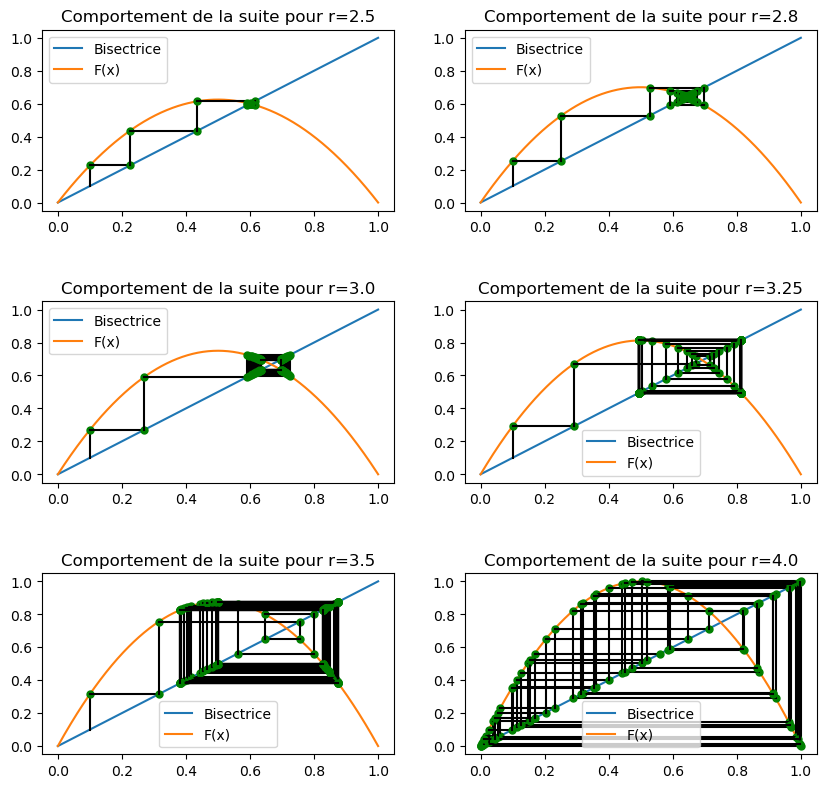

In [4]:
#tracés des suites
plt.figure(figsize=(10, 20))
for i in range (len(r)): #on trace 5 graphe pour les 5 valeurs de r
    r_actuel=r[i] #affecte la i-ème valeur de r
    def F(x):
        '''Fonction associée à la suite'''
        return (r_actuel*(1 - x)*x) 
    plt.subplot(len(r), 2, i + 1)
    plt.title(f'Comportement de la suite pour r={r_actuel}')
    plt.plot(x,x, label = 'Bisectrice')
    plt.plot(x,F(x), label = 'F(x)')
    plt.legend()
    plt.subplots_adjust(hspace=0.5)
    for k in range(N):
        x1 = F(x0)
        plt.plot([x0, x0], [x0, x1], 'k') #on démarre de la bisectrice puis on va sur la courbe verticalement
        plt.plot([x0], [x1], 'og', markersize=5) #on trace un trait horizontal allant sur la bisectrice
        plt.plot([x0, x1], [x1, x1], 'k') #etc
        plt.plot([x1], [x1], 'og', markersize=5)
        x0 = x1 #met à jour la valeur initiale pour la prochaine itération
    x0 = 0.1 #on réinitialise la valeur de x0 pour les prochains graphes

On constate que la suite converge vers 0.6 lorsque $r=$2.5  
On peut conjecturer que cette suite converge pour $r$  $\le$ 3 mais qu'elle commence à diverger pour $r$=3 et a un comportement chaotique lorsqu'on s'approche de $r$=4 (la divergence est de plus en plus forte).

### __3.2 Diagramme de bifurcation__

Dans cette partie, nous allons créer un __diagramme de bifurcation__ pour analyser comment la limite de la suite logistique dépend du paramètre $r$ lorsqu'elle existe.  
Pour ce faire, nous calculons les termes de la suite pour un grand nombre de valeurs de $r$ comprises entre 2.5 et 4, avec une condition initiale fixée ($x_0$=0.00001) puis pour d'autres conditions initiales $x_0$.  

- Pour chaque valeur de $r$, nous itérons la suite sur 1000 termes.  
- Nous conservons uniquement les 100 derniers termes, car ils représentent le comportement asymptotique de la suite.  
- Nous plaçons ces 100 derniers termes en ordonnée pour chaque valeur de $r$ en abscisse.

Nous allons pouvoir ainsi visualiser les comportements asymptotiques de la suite et vérifier si le comportement dépend de la condition initiale $x_0$. 

In [5]:
#paramètres
r = np.linspace(2.5, 4, 1000) 
x0_valeurs = [0.0001, 0.001, 0.01, 0.1]    

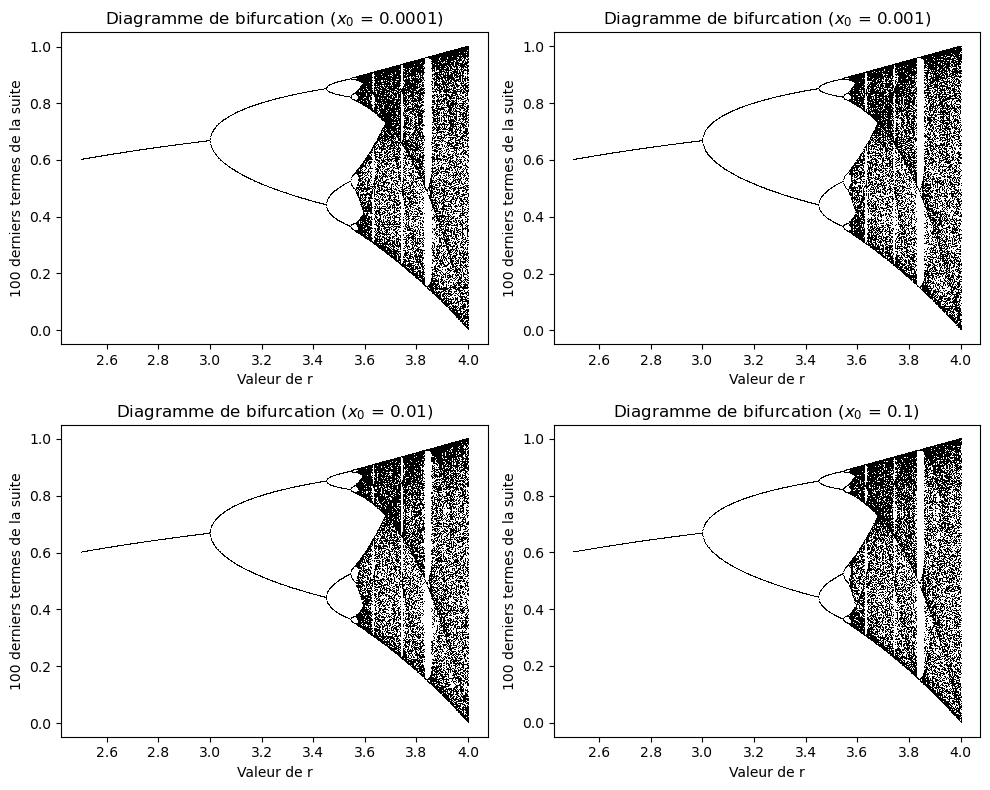

In [6]:
#tracés des graphes
plt.figure(figsize=(10, 8))
for i in range(len(x0_valeurs)): 
    plt.subplot(2, 2, i + 1)  
    x0 = x0_valeurs[i] 
    for r_actuel in r: 
        suite = []  
        x = x0  
        for j in range(1000):  
            x = r_actuel * (1 - x) * x  
            if j >= 900:  
                suite.append(x)
        plt.plot([r_actuel] * len(suite), suite, ',k')  # on s'assure d'avoir la même dimension en x et y
    plt.title(f"Diagramme de bifurcation ($x_0$ = {x0})")
    plt.xlabel("Valeur de r")
    plt.ylabel("100 derniers termes de la suite")
plt.tight_layout()  
plt.show()

La conjecture faite après les représentations de la suite en 3.1 semble se confirmer. Nous pouvons cependant établir certaines précisions.
- La partie gauche du diagramme montre une ligne unique où toutes les valeurs asymptotiques convergent vers un point fixe.
  __Le comportement du système est stable__ et la population atteint une valeur constante à long terme.
- À partir de $r=$ 3, on observe un __dédoublement de la branche__, une première bifurcation. Cela signifie que la suite alterne entre deux valeurs périodiques. On observe d'autres birfucations en s'approchant de $r=$ 3,5. Elle reste à priori stable bien qu'elle ne converge pas.
- Dans la région $r$ > 3.5, le diagramme __devient dense__. __Le comportement est chaotique__, les valeurs de la suite deviennent __imprévisibles__.
- Lorsque r s'approche de 4, les branches deviennent tellement denses qu’elles remplissent presque toute l'intervalle de valeurs possibles (entre 0 et 1). __On a affaire à un chaos maximal__. Certaines zones présentent quand même des stabilités comme par exemple autour de 3.8.

Nous observons également que __le diagramme de bifurcation ne dépend pas de $x_0$__. Le comportement de la suite ne dépend donc pas de la population initiale mais uniquement de la valeur de r.

### __3.3 Exposant de Lyapunov__

Dans cette partie, nous allons __calculer et représenter l’exposant de Lyapunov__ pour l’équation logistique en fonction du paramètre $r$. Cela permettra d'analyser la stabilité ou le chaos du système et de faire le lien avec le diagramme de bifurcation.

L'objectif est de nouveau de déterminer si pour une valeur donnée de $r$, le système est stable ou chaotique :
- Si $\lambda$<0 (exposant négatif), le système est __stable__ (convergence vers un point fixe ou cycle périodique).
- Si $\lambda$>0 (exposant positif), le système est __chaotique__ (divergence)

L'expression de $\lambda(r)$ est

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$
où $f^{\prime} (x_i) = r(1-2x)$.  
Pour chaque valeur de $r$ entre 2.5 et 4, nous allons calculer $\lambda(r)$. Nous approchons la limite en calculant $\lambda$  pour n=1000 itérations.

In [7]:
r = np.linspace(2.5, 4, 2000) 
x0=0.001 #arbitraire
N=1000 #nb d'itérations

In [7]:
def Lyapunov(r,x):
   '''Fonction permettant de calculer lambda par la suite'''
   return np.log(np.abs(r*(1-2*x)))
    
exposant=[]
for r_actuel in r:
    x=x0 #réinitialisation pour chaque r
    lamda=0
    for i in range(N):
        x = r_actuel * x * (1 - x)  
        lamda = lamda + Lyapunov(r_actuel, x) #on somme les différents lambda
    exposant.append(lamda / N) #on calcule la moyenne

Nous traçons un point pour chaque couple ($r$ , $\lambda$).  
Les points noirs représentent les zones où $\lambda$<0 (stables) . Les points rouges représentent les zones où $\lambda$>0 (chaotiques). Une ligne horizontale bleue ($\lambda$=0) sépare les régimes stables et chaotiques.

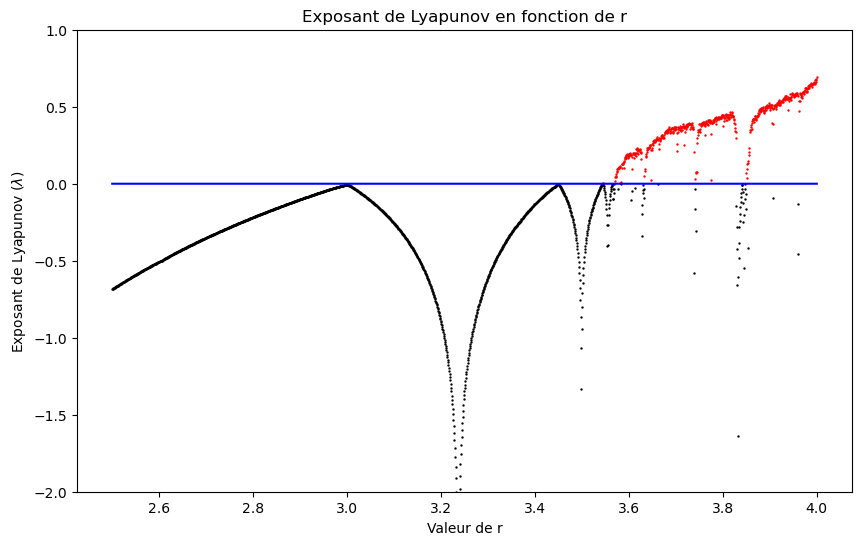

In [9]:
#tracé du graphique, un peu long à charger une fois exécuté
plt.figure(figsize=(10, 6))

for i in range(len(r)):
    if exposant[i] < 0:
        plt.scatter(r[i], exposant[i], color='black', s=0.5)  #zones stables
    elif exposant[i] > 0 :
        plt.scatter(r[i], exposant[i], color='red', s=0.5) #zones chaotiques   

plt.plot(r,np.zeros(len(r)),'b', label='$\lambda=0$') #ligne horizontale représentant lamnda = 0
plt.title("Exposant de Lyapunov en fonction de r")
plt.xlabel("Valeur de r")
plt.ylabel("Exposant de Lyapunov ($\lambda$)")
plt.ylim(-2,1)
plt.show()

En faisant le lien avec le diagramme de bifurcartion :
- Pour $r$ $\le$ 3.5, l’exposant de Lyapunov (tous les points noirs) confirme que le __système est stable__, ce qui est en accord avec le comportement convergent ou périodique visible dans le diagramme de bifurcation. Pour $r$ compris entre 3 et 3.5 il n'y a quand même pas de convergence, pour rappel.
- Pour $r$>3.5, on observe que la majorité des points sont rouges. Cela indique le __passage au système chaotique__, visible dans le diagramme comme une grande densité de points.
- Pour r compris entre 3.5 et 4, on peut tout de même observer des points noirs : __le système peut donc être stable même en régime chaotique__ (bien que rare), comme nous l'avons vu dans le diagramme.

__Nous avons ainsi prouver que pour $r$ $\le$ 3, le système est stable. Pour r compris entre 3 et 3.5, le système est stable mais transite vers le chaos. Pour $r$ > 3.5, le système est chaotique.__

### __4. Interprétation pour la population des lapins__

Appliquons ce que l'on a appris à une population de lapins.  
- __Régime stable__ ($r$ $\le$3) :  le taux de croissance est modéré. La population converge vers une valeur fixe et il y a un équilibre entre reproduction et ressources. 
- __Transition périodique vers le chaos__ (3<$r$ $\le$3.5) : la population oscille de manière périodique entre plusieurs niveaux, restant quand même prévisible. 
- __Régime chaotique__ ($r$>3.5) : la population devient chaotique, avec des fluctuations imprévisibles dues à un taux de croissance trop élevé. Ces variations représentent une instabilité extrême où de petites différences initiales entraînent des trajectoires divergentes comme vu avec l'exposant de Lyapunov.

Cela implique plusieurs choses.  
Une stabilité à long terme peut être garantie en maintenant un taux de croissance modéré. Les cycles périodiques nécessitent tout de même une surveillance pour éviter des risques à long terme. Le chaos rend la population imprévisible, c'est pour cela qu'on cherche à limiter la surpopulation et préserver les ressource car sinon cela pourrait menacer l'équilibre de l'écosystème.


## __Conclusion__
Nous sommes parvenus à simuler et visualiser les comportements des suites récurrentes associées à l'équation logistique. Le diagramme de bifurcation et le calcul de l'exposant de Lyapunov ont permis de relier les comportements dynamiques à la stabilité et au chaos. Ces analyses permettent de mieux comprendre la gestion des populations animales et d'éviter des régimes chaotiques. Nous remarquons tout de même les limites de notre modélisation : le modèle ne prend pas en compte les phénomènes aléatoires tels que les variations climatiques, les migrations ou les catastrophes naturelles (qui sont assez courants dans la nature).La reproduction et les ressources sont supposées homogènes et constantes, ce qui simplifie la réalité. On pourrait intégrer du bruit dans notre code pour modéliser l'impact des facteurs environnementaux aléatoires. On pourrait également prendre en compte un nombre de ressources qui varie pour mieux représenter la réalité.  
__Malgré ces simplifications, notre étude a atteint son objectif__ en mettant en évidence les différentes dynamiques possibles d’une population à travers l’équation logistique.